# Preprocessing

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')

In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')
elec=deps.buildings[1].elec # Todos los medidores

labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Change in data sampling and interpolation

Let's check if there are missing sections


In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)

Sampling every 10 seconds, averaging data (mean) as filling method and using the first data

In [4]:
ta = '2023-06-09 09:34:38+01:00' #tiempo inicial
tb = '2023-06-09 13:36:19+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity           current             voltage     power   current  \
type                       armonic6 armonic32 armonic31 armonic33 armonic47   
2023-06-09 10:34:40+02:00  0.004250  0.002078  0.274218  0.000452  0.002026   
2023-06-09 10:34:50+02:00  0.004081  0.000718  0.270415  0.000518  0.001896   
2023-06-09 10:35:00+02:00  0.004379  0.001386  0.264111  0.000344  0.003079   
2023-06-09 10:35:10+02:00  0.004746  0.001822  0.269301  0.000097  0.001985   
2023-06-09 10:35:20+02:00  0.006011  0.001719  0.278764  0.000027  0.002932   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:35:30+02:00  0.003603  0.001690  0.475928 -0.004471  0.007189   
2023-06-09 13:35:40+02:00  0.003564  0.001128  0.471303 -0.004738  0.007341   
2023-06-09 13:35:50+02:00  0.002054  0.001413  0.478134 -0.003348  0.005553   
2023-06-09 13:36:00+02:00  0.001644  0.000826  0.478811 -0.003246  0.005279   
2023-06-09 13:36:10+02:00  0.001754  0.001070  0.458811 -0.003014  0.005171   

physical_quantity                                                     power  \
type                      armonic46 armonic40  armonic9 armonic16 armonic21   
2023-06-09 10:34:40+02:00  0.001370  0.001340  0.127730  0.002890 -0.001430   
2023-06-09 10:34:50+02:00  0.001157  0.001217  0.127007  0.002285 -0.001088   
2023-06-09 10:35:00+02:00  0.000783  0.000792  0.135988  0.002965 -0.000396   
2023-06-09 10:35:10+02:00  0.001675  0.001508  0.128602  0.002927 -0.001394   
2023-06-09 10:35:20+02:00  0.000977  0.001307  0.062267  0.002211 -0.002138   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:35:30+02:00  0.000833  0.001268  0.046952  0.002484 -0.010152   
2023-06-09 13:35:40+02:00  0.000643  0.001150  0.048837  0.002462 -0.010896   
2023-06-09 13:35:50+02:00  0.001000  0.001150  0.014468  0.001814 -0.007490   
2023-06-09 13:36:00+02:00  0.000629  0.000753  0.014464  0.000853 -0.007848   
2023-06-09 13:36:10+02:00  0.000956  0.000978  0.013547  0.001721 -0.008129   

physical_quantity          ...   voltage   current             voltage  \
type                       ... armonic16 armonic22  armonic8 armonic47   
2023-06-09 10:34:40+02:00  ...  0.019715  0.002290  0.002929  0.038197   
2023-06-09 10:34:50+02:00  ...  0.015449  0.001123  0.002399  0.038060   
2023-06-09 10:35:00+02:00  ...  0.029651  0.001879  0.002910  0.046567   
2023-06-09 10:35:10+02:00  ...  0.019967  0.002202  0.002901  0.062774   
2023-06-09 10:35:20+02:00  ...  0.015241  0.001356  0.003970  0.046280   
...                        ...       ...       ...       ...       ...   
2023-06-09 13:35:30+02:00  ...  0.024839  0.001929  0.003676  0.062952   
2023-06-09 13:35:40+02:00  ...  0.022892  0.002462  0.003404  0.056593   
2023-06-09 13:35:50+02:00  ...  0.022947  0.001719  0.001988  0.059423   
2023-06-09 13:36:00+02:00  ...  0.020341  0.000961  0.002205  0.063887   
2023-06-09 13:36:10+02:00  ...  0.031032  0.001701  0.001389  0.065811   

physical_quantity                                         current            \
type                      armonic46 armonic40  armonic9 armonic10 armonic20   
2023-06-09 10:34:40+02:00  0.012836  0.010806  1.856911  0.002795  0.002376   
2023-06-09 10:34:50+02:00  0.011435  0.015551  1.833418  0.002889  0.001334   
2023-06-09 10:35:00+02:00  0.015055  0.010720  1.848650  0.003868  0.001916   
2023-06-09 10:35:10+02:00  0.010633  0.013192  1.816425  0.003879  0.001742   
2023-06-09 10:35:20+02:00  0.012520  0.013116  1.953161  0.002642  0.001325   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:35:30+02:00  0.009008  0.021739  2.221743  0.002382  0.002511   
2023-06-09 13:35:40+02:00  0.012818  0.015257  2.136890  0.002799  0.002830   
2023-06-09 13:35:50+02:00  0.011214  0.014096  2.147191  0.001665  0.001978   
2023-06-09 13:36:00+02:00  0.012684  0.015719  2.134185  0.001633  0.001021   
2023-06-09 13:36:10+02:00  0.0100

# Get main meter data every 60 seconds.

In addition to the parameter sample_period=60, required to change the sampling to one minute, the default sampling change method (mean) provided by NILMTK has been specified as the method (how). In the same resample_kwargs dictionary, the fill_method parameter has been specified which will correspond to the chosen method to fill gaps. In this case, the ffill method is specified which, when faced with a gap, will fill in missing data forward with the value immediately prior to the time series.

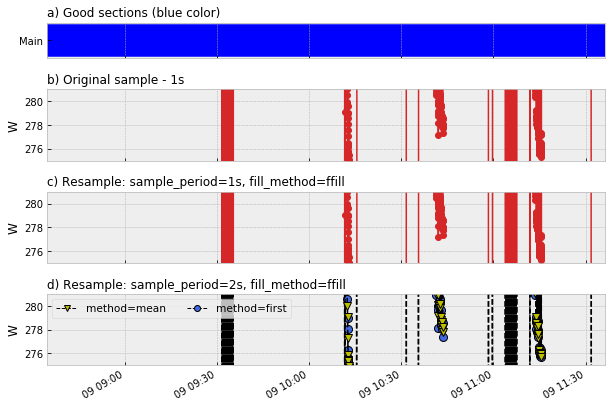

In [5]:
rcParams['figure.figsize'] = (10, 7)


#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Electric Device Filtering

We will filter for devices whose active power is greater than 5.85 kWh


In [6]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Let's check the top-k among connected electrical devices

In [7]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
)

## Dataset Division

- train: training dataset for disaggregation models
- test: validation and testing dataset for disaggregation models

Training:

In [8]:
train = DataSet('dsualmh.h5')

train.set_window(start="2023-06-09 09:34:00", end="2023-06-09 12:54:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 12:54:00+02:00', empty=False)

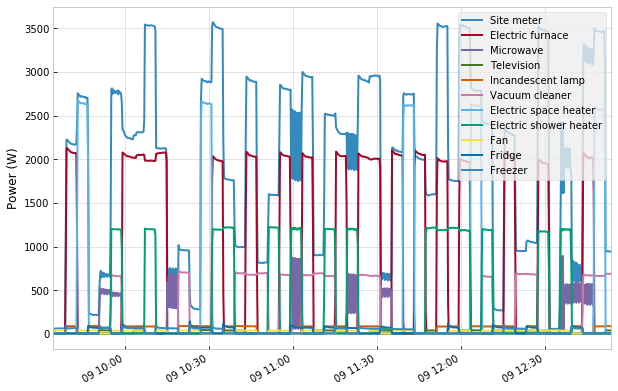

In [9]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validation:

In [10]:
 #Validación 

valid = DataSet('dsualmh.h5')

valid.set_window(start="2023-06-09 12:55:00", end="2023-06-09 13:36:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2023-06-09 12:55:00+02:00', end='2023-06-09 13:36:00+02:00', empty=False)

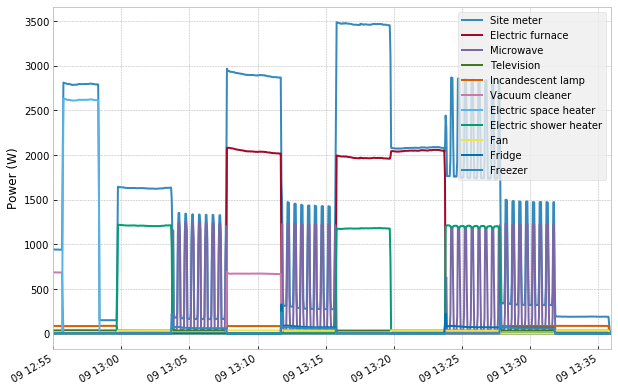

In [11]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Test:

In [12]:
#test = DataSet('dsualmh_test.h5') #Pruebas
#test.set_window(start="2023-06-06 11:19:19", end="2023-06-06 11:40:28")
#test_elec=test.buildings[1].elec
#test_elec.get_timeframe()
test =DataSet('dsualmh_testing.h5')
test_elec = test.buildings[1].elec
test.set_window(start="2023-01-25 10:43:00", end="2023-01-25 12:46:00")  #TODAS LAS MUESTRAS del SEGUNDO DATASET DE PRUEBAS
test_elec=test.buildings[1].elec
test_elec.get_timeframe()


TimeFrame(start='2023-01-25 10:43:19+01:00', end='2023-01-25 12:46:00+01:00', empty=False)

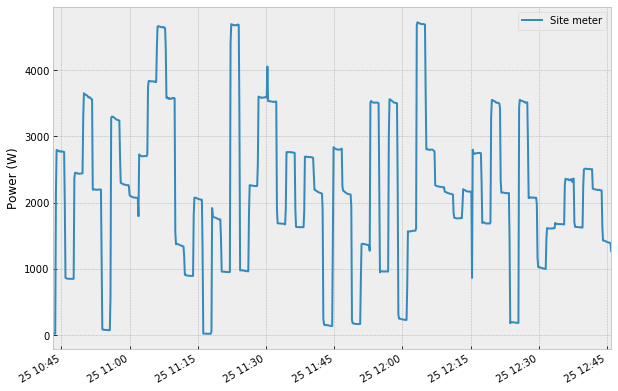

In [13]:
test_elec.mains().plot()